# Importing the Libraries and the Dataset

In [1]:
import numpy as np   #for mathematical operation
import pandas as pd  #for data analysis
import matplotlib.pyplot as plt   #for data visualisation
import seaborn as sns

In [2]:
df = pd.read_csv('Lightning Strike(2018).csv')

# The shape method returns the total no. of Rows and columns for the Dataset.
df.shape

(3401012, 5)

In [3]:
# The head function is used to review initial rows of the Dataset.
df.head()

,Unnamed: 0,date,number_of_strikes,x_coord,y_coord
0,3125,2018-08-09,1,-68.0,36.0
1,3126,2018-08-09,1,-78.7,18.4
2,3127,2018-08-09,1,-78.1,18.4
3,3128,2018-08-09,1,-74.5,47.0
4,3129,2018-08-09,1,-70.4,47.0


In [4]:
# In order to manipulate the date atrribute, we need to convert it from 
# string format to Datetime object format.

df['date'] = pd.to_datetime(df['date'])

In [5]:
# df.info() returns the Datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 5 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unnamed: 0         int64         
 1   date               datetime64[ns]
 2   number_of_strikes  int64         
 3   x_coord            float64       
 4   y_coord            float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 129.7 MB


In [6]:
df.describe(include='all')

,Unnamed: 0,date,number_of_strikes,x_coord,y_coord
count,3.401012e+06,3401012,3.401012e+06,3.401012e+06,3.401012e+06
mean,6.320535e+06,2018-07-13 03:32:02.018505984,1.311403e+01,-9.081778e+01,3.374688e+01
min,3.125000e+03,2018-01-01 00:00:00,1.000000e+00,-1.418000e+02,1.660000e+01
25%,2.862834e+06,2018-06-04 00:00:00,2.000000e+00,-1.008000e+02,2.760000e+01
50%,6.376452e+06,2018-07-18 00:00:00,4.000000e+00,-9.070000e+01,3.350000e+01
75%,9.301305e+06,2018-08-24 00:00:00,1.200000e+01,-8.130000e+01,3.970000e+01
max,1.281428e+07,2018-12-31 00:00:00,2.211000e+03,-4.320000e+01,5.170000e+01
std,3.717905e+06,NaN,3.212099e+01,1.296593e+01,7.838555e+00


# Data Cleaning

In [7]:
# df.drop method is used to get rid of any unnecessary atrributes.

df = df.drop(['Unnamed: 0'], axis=1)
df.head(10)

,date,number_of_strikes,x_coord,y_coord
0,2018-08-09,1,-68.0,36.0
1,2018-08-09,1,-78.7,18.4
2,2018-08-09,1,-78.1,18.4
3,2018-08-09,1,-74.5,47.0
4,2018-08-09,1,-70.4,47.0
5,2018-08-09,1,-98.2,19.5
6,2018-08-09,1,-70.8,49.0
7,2018-08-09,1,-96.2,19.3
8,2018-08-09,1,-95.8,19.3
9,2018-08-09,1,-99.5,19.8


In [8]:
# df.drop_duplicates() method is used to remove all the duplicated rows, if any.

df = df.drop_duplicates()

In [9]:
# isnull() function returns the null values in a dataset.
df.isnull().sum()

date                 0
number_of_strikes    0
x_coord              0
y_coord              0
dtype: int64

### Outliers

<Axes: ylabel='number_of_strikes'>

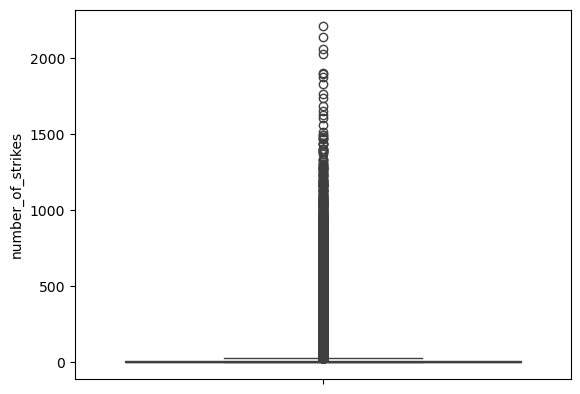

In [10]:
sns.boxplot(y=df['number_of_strikes'], showfliers=True)

In [11]:
df['number_of_strikes'].describe()

# the mean, median, percentiles and the max values hint that there are outliers.

count    3.401012e+06
mean     1.311403e+01
std      3.212099e+01
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      1.200000e+01
max      2.211000e+03
Name: number_of_strikes, dtype: float64

In [12]:
# Removing the Outliers
# Step 1: Calculate the q1 and q3 values

q1 = df['number_of_strikes'].quantile(0.25)
q3 = df['number_of_strikes'].quantile(0.75)
print(q1, q3)

2.0 12.0


In [13]:
# Step 2: Calculate the IQR
iqr = q3 - q1
print(iqr)

10.0


In [14]:
# Step 3: Calculate the Range of the data.
lower_limit = q1 - (iqr * 1.5)
upper_limit = q3 + (iqr * 1.5)
print(lower_limit, upper_limit)

-13.0 27.0


In [15]:
# Step 4: Filtering the Data
df = df[df['number_of_strikes'] <= upper_limit]

<Axes: ylabel='number_of_strikes'>

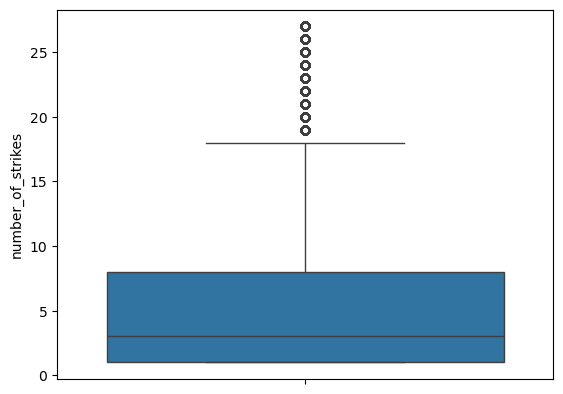

In [16]:
sns.boxplot(y=df['number_of_strikes'], showfliers=True)

# Data Visualization

In [17]:
# we need to structure the data acc. to the year and month to better visualize the data.

df['year-month'] = df['date'].dt.strftime('%Y-%m')
df.head()

,date,number_of_strikes,x_coord,y_coord,year-month
0,2018-08-09,1,-68.0,36.0,2018-08
1,2018-08-09,1,-78.7,18.4,2018-08
2,2018-08-09,1,-78.1,18.4,2018-08
3,2018-08-09,1,-74.5,47.0,2018-08
4,2018-08-09,1,-70.4,47.0,2018-08


In [22]:
# Grouping the data on the basis of month of the year.

df_by_month = df.groupby(by=['year-month']).sum(numeric_only=True).reset_index()
df_by_month

,year-month,number_of_strikes,x_coord,y_coord
0,2018-01,273625,-4333430.8,1569950.1
1,2018-02,357729,-4536461.1,1617088.3
2,2018-03,430877,-8111220.1,3235768.3
3,2018-04,731396,-12107819.5,4442517.1
4,2018-05,2046258,-35694991.5,14076944.7
5,2018-06,2492402,-38752470.9,15193002.9
6,2018-07,3625787,-59451468.8,22168794.0
7,2018-08,4278316,-52985236.9,19470301.3
8,2018-09,1735797,-32404645.7,11201065.3
9,2018-10,675756,-15014833.3,5205533.7


In [24]:
df_by_month = df_by_month.drop(['x_coord', 'y_coord'], axis=1)
df_by_month

,year-month,number_of_strikes
0,2018-01,273625
1,2018-02,357729
2,2018-03,430877
3,2018-04,731396
4,2018-05,2046258
5,2018-06,2492402
6,2018-07,3625787
7,2018-08,4278316
8,2018-09,1735797
9,2018-10,675756


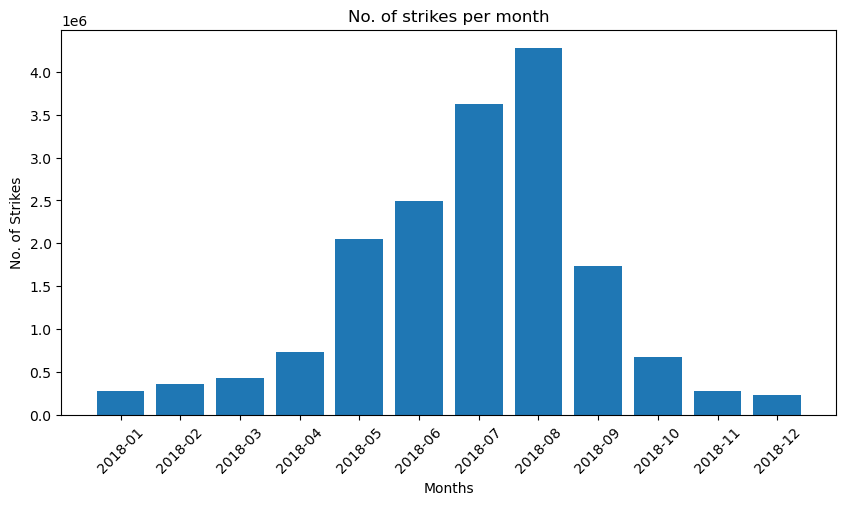

In [28]:
# Visualizing the Results.
plt.figure(figsize=(10, 5))
plt.bar(df_by_month['year-month'], df_by_month['number_of_strikes'])
plt.xlabel('Months')
plt.ylabel('No. of Strikes')
plt.title('No. of strikes per month')
plt.xticks(rotation=45)
plt.show()